# Problem Statement




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Fetch Data

In [2]:
df_url = pd.read_csv('dataset.csv')
df_url.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [3]:
df_url.shape

(10000, 18)

In [4]:
df_url.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [5]:
df_url.dtypes

Domain           object
Have_IP           int64
Have_At           int64
URL_Length        int64
URL_Depth         int64
Redirection       int64
https_Domain      int64
TinyURL           int64
Prefix/Suffix     int64
DNS_Record        int64
Web_Traffic       int64
Domain_Age        int64
Domain_End        int64
iFrame            int64
Mouse_Over        int64
Right_Click       int64
Web_Forwards      int64
Label             int64
dtype: object

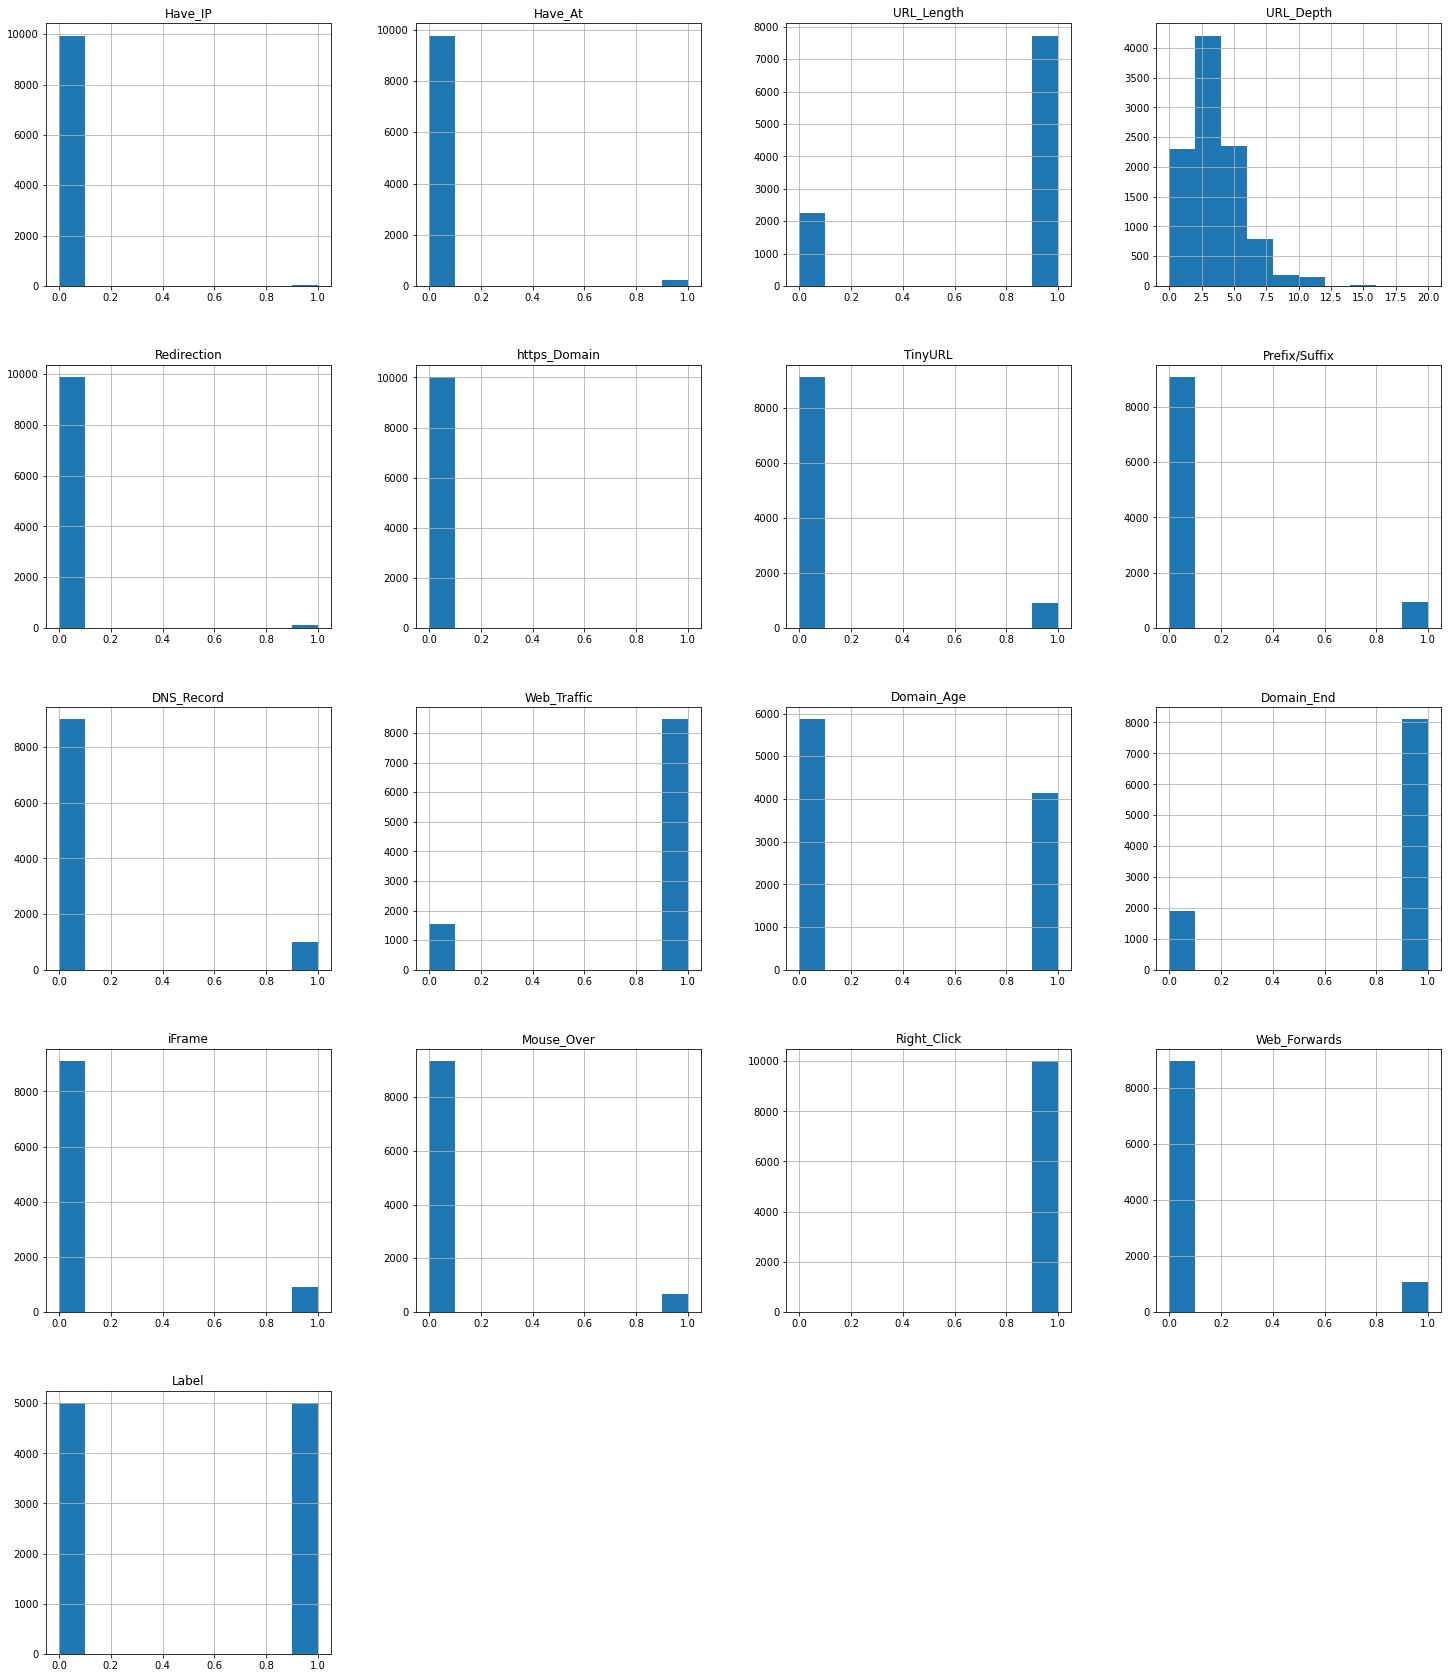

In [6]:
df_url.hist(figsize=(25,30))
plt.show()

# Data Preprocessing

In [7]:
df_url.head(51)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
5,nypost.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0,0
6,kienthuc.net.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
7,thenextweb.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
8,tobogo.net,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
9,akhbarelyom.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0


In [8]:
#  The data we have is mostly categorical and 0 or 1, with one column of numeric data.
#  The domain column doesn't add much value, so we're going to drop it.

In [9]:
#Dropp Domain column
df_url = df_url.drop(['Domain'], axis=1).copy()

In [10]:
#Checking for null values
df_url.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [11]:
#  The dataset has no null values, so there is no need for the null value treatment.

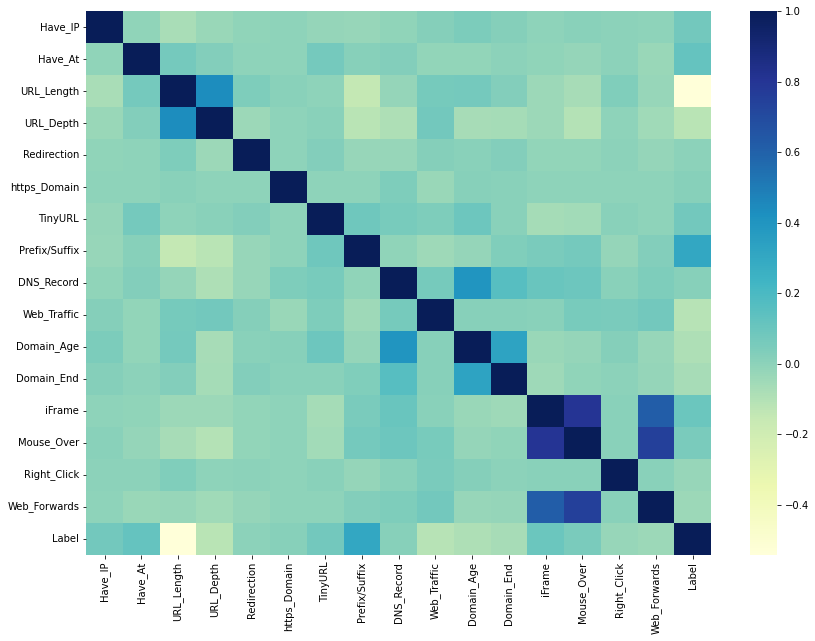

In [12]:
#  We know that there is a correlation between the columns, but we need to understand the nature of that relationship and how it can be expressed mathematically.

plt.figure(figsize=(14,10))
sns.heatmap(df_url.corr(), cmap="YlGnBu")
plt.show()

In [13]:
#  The heatmap shows that there are both positive and negative correlations in the data. This is good news, because it means that the extracted features will contribute to model training.

 # Data Splitting

In [14]:
 #  Before we split the data, we shuffle it so it has equal distribution of phishing website URLs and legitimate URLs in both the test and the training dataset. 
 #  This will ensure that the model is not biased towards one type of URL or another.

In [15]:
df_url = df_url.sample(frac=1).reset_index(drop=True)
df_url.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,1,0,1,1,1,1,1,0
1,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,1
3,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,0
4,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,0


In [16]:
#  The 80-20 split is a great way to split up data before you begin training, testing, and evaluating your model. It's also called the "train-test split" because you're splitting your data into two parts: the training set and the test set.

# In this case, we'll use an 80%/20% split for our training and test sets. The 80% part will be used to train your model, and the 20% will be used to evaluate how well the model performs on new data that hasn't been seen by the model before.

In [17]:
from sklearn.model_selection import train_test_split

y = df_url['Label']
x = df_url.drop('Label', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape


((8000, 16), (2000, 16))

# Model Training

It's clear from the problem statement that this is a classification problem. Therefore, we have collected the following dataset to detect if an URL is phishing (1) or not (0).

Independent variable: 0 or 1

Dependent variable: 0 or 1

Decision Tree
Support Vector Machines
Random Forest
XGBoost


In [18]:
from sklearn.metrics import accuracy_score
# Storing model performance results

Model = []
train_acy =[]
test_acy = []


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model
dtree = DecisionTreeClassifier(max_depth = 10)
# Fit the model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
# Model Prediction

dt_test_pred = dtree.predict(x_test)
dt_train_pred = dtree.predict(x_train)

In [21]:
# Accuracy of the Model

d_train_acy = accuracy_score(y_train, dt_train_pred)
d_test_acy = accuracy_score(y_test, dt_test_pred)

print("Accuracy of Decision Trees on training Data: {:.3f}".format(d_train_acy))
# When it comes to accuracy measures, the most commonly used is classification accuracy. 
# It's simply the percentage of correct predictions made by a classifier. This measure is common because it's easy to calculate and interpret,
# but it can be misleading. In general, it's better to use another measure of accuracy or precision when evaluating your model.
print("Accuracy on Decision Tree on test Data: {:.3f}".format(d_test_acy))

Accuracy of Decision Trees on training Data: 0.845
Accuracy on Decision Tree on test Data: 0.845


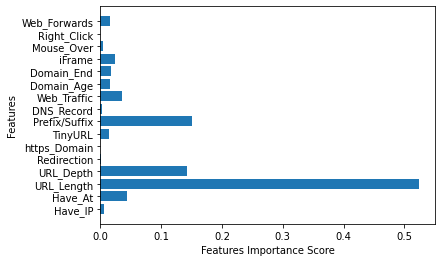

In [22]:
plt.barh(range(x_train.shape[1]),dtree.feature_importances_)
plt.yticks(np.arange(x_train.shape[1]), x_train.columns)
plt.xlabel("Features Importance Score")
plt.ylabel("Features")
plt.show()

In [23]:
#  From the above, we see that URL_Length contributed the most to the Decision Tree Model. This is because this feature has a high value for the number of people who clicked on it.

In [24]:
# Storing the results 

Model.append('Decision Tree')
train_acy.append(round(d_train_acy, 3))
test_acy.append(round(d_test_acy, 3))

In [25]:
print(Model,train_acy,test_acy)

['Decision Tree'] [0.844] [0.844]


# Support Vector Machine

In [26]:
from sklearn.svm import SVC

# Creating the model 
svm = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
# Creating the model prodiction
SVM_test_pred = svm.predict(x_test)
SVM_train_pred = svm.predict(x_train)

In [28]:
# Accuracy of the Model

SVM_train_acy = accuracy_score(y_train,SVM_train_pred)
SVM_test_acy = accuracy_score(y_test,SVM_test_pred)

print(" The accuracy of SVM on training data is: {:.3f}".format(SVM_train_acy))
print(" The accuracy of SVM on testing data is: {:.3f}".format(SVM_test_acy))

 The accuracy of SVM on training data is: 0.801
 The accuracy of SVM on testing data is: 0.806


In [29]:
# Storing the results

Model.append('SVM')
train_acy.append(round(SVM_train_acy, 3))
test_acy.append(round(SVM_test_acy, 3))


In [30]:
print(Model,train_acy,test_acy)

['Decision Tree', 'SVM'] [0.844, 0.801] [0.844, 0.806]


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Creating the Model
Random_forser = RandomForestClassifier(max_depth=10)

# Fiting the Model
Random_forser.fit(x_train,y_train)


RandomForestClassifier(max_depth=10)

In [32]:
# Model Prediction
RF_test_pred = Random_forser.predict(x_test)
RF_train_pred = Random_forser.predict(x_train)


In [33]:
# Accuracy of the Model 

RF_test_acy = accuracy_score(y_test,RF_test_pred)
RF_train_acy = accuracy_score(y_train,RF_train_pred)

print(" The accuracy of Random Forest on training data is: {:.3f}".format(RF_train_acy))
print(" The accuracy of Random Forest on testing data is: {:.3f}".format(RF_test_acy))



 The accuracy of Random Forest on training data is: 0.841
 The accuracy of Random Forest on testing data is: 0.841


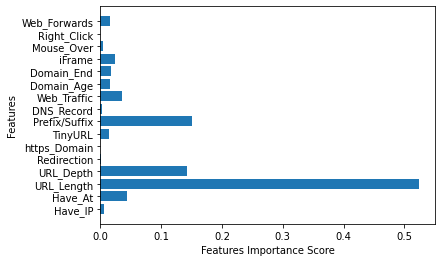

In [34]:
plt.barh(range(x_train.shape[1]),dtree.feature_importances_)
plt.yticks(np.arange(x_train.shape[1]), x_train.columns)
plt.xlabel("Features Importance Score")
plt.ylabel("Features")
plt.show()

In [35]:
# Storing the results

Model.append('Random Forest')
train_acy.append(round(RF_train_acy, 3))
test_acy.append(round(RF_test_acy, 3))



In [36]:
print(Model,train_acy,test_acy)

['Decision Tree', 'SVM', 'Random Forest'] [0.844, 0.801, 0.841] [0.844, 0.806, 0.84]


# XGBoost Classifier

In [37]:
from xgboost import XGBClassifier

# Creting the Model
xgboost = XGBClassifier(learning_rate=0.5,max_depth=10)

# Fit the Model
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
# Model Prediction

xgboost_test_pred = xgboost.predict(x_test)
xgboost_train_pred = xgboost.predict(x_train)


In [39]:
xgboost_test_acy = accuracy_score(y_test, xgboost_test_pred)
xgboost_train_acy = accuracy_score(y_train, xgboost_train_pred)


print(" The accuracy of XGBoost Classifier on testing data is: {:.3f}".format(xgboost_test_acy))
print(" The accuracy of XGBoost Classifier on training  data is: {:.3f}".format(xgboost_train_acy))

 The accuracy of XGBoost Classifier on testing data is: 0.862
 The accuracy of XGBoost Classifier on training  data is: 0.868


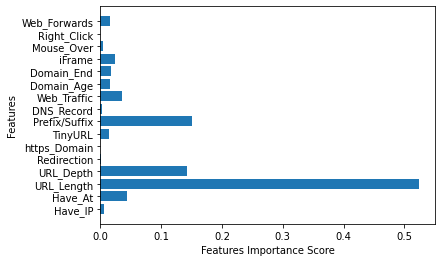

In [43]:
plt.barh(range(x_train.shape[1]),dtree.feature_importances_)
plt.yticks(np.arange(x_train.shape[1]), x_train.columns)
plt.xlabel("Features Importance Score")
plt.ylabel("Features")
plt.show()

In [40]:
# Storing the results

Model.append('XGBoost Classifier')
train_acy.append(round(xgboost_train_acy, 3))
test_acy.append(round(xgboost_test_acy, 3))


In [41]:
print(Model,train_acy,test_acy)

['Decision Tree', 'SVM', 'Random Forest', 'XGBoost Classifier'] [0.844, 0.801, 0.841, 0.868] [0.844, 0.806, 0.84, 0.862]


# Compare Model Results

In [42]:
results = pd.DataFrame({'Model': Model,
                        'Train Accuracy': train_acy,
                        'Test Accuracy': test_acy})
results

,Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.844,0.844
1,SVM,0.801,0.806
2,Random Forest,0.841,0.840
3,XGBoost Classifier,0.868,0.862


In [ ]:
# XGBoost preforms the best in detecting phishing URLs